In [140]:
import os
from glob import glob
from xorca.lib import load_xorca_dataset
import xgcm
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
from cmocean import cm
from matplotlib import colors
import cartopy.crs as ccrs
os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/shkifmjr/cartopy_images/'

import warnings
warnings.simplefilter('ignore')
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

#### Define path to data

In [2]:
meshdir = "/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/"
meshfile_mask = "mesh_mask.nc"

path_10 = '/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/' # EXP 03 

In [3]:
mask = xr.open_dataset(meshdir + meshfile_mask)

#### Rename dimension z to deptht to multiply different variables with same dimensions

In [ ]:
mask = mask.rename({'z':'deptht'})

In [77]:
mask

<xarray.Dataset>
Dimensions:       (deptht: 46, t: 1, x: 722, y: 511)
Dimensions without coordinates: deptht, t, x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (deptht) float32 3.0467727 9.454049 ... 5624.9517 5875.141
    time_counter  (t) float64 0.0
    tmask         (t, deptht, y, x) int8 ...
    umask         (t, deptht, y, x) int8 ...
    vmask         (t, deptht, y, x) int8 ...
    fmask         (t, deptht, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, deptht, y, x) float64 ...
    e3u_0         (t, deptht, y, x) float64 ...
    e3v_0         (t, deptht, y, x) float64 ...
    e3w_0         (t, deptht, y, x) float64 ...
    gdept_0       (t, deptht, y, x) float32 ...
    gdepu         (t, deptht, y, x) float32 ...
    gdepv         (t, deptht, y, x) float32 ...
    gdepw_0       (t, deptht, y, x) float32 ...
    gdept_1d      (t, deptht) float64 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
    gdepw_1d      (t, deptht) float64 0.0 6.194 12.84 ... 5.5e+03 5.75e+03
    e3t_1d        (t, deptht) float64 6.191 6.64 7.2 7.895 ... 249.5 250.0 250.4
    e3w_1d        (t, deptht) float64 6.0 6.403 6.905 ... 249.3 249.8 250.2

#### Open data and combine by coordinates. Set variables

In [6]:
output_58 = sorted(glob(path_10 + '*1y*Ross_1958_1968.nc'))
output_69 = sorted(glob(path_10 + '*1y*Ross_1969_1974.nc'))
output_75 = sorted(glob(path_10 + '*1y*Ross_1975_1979.nc'))
output_80 = sorted(glob(path_10 + '*1y*Ross_1980_1983.nc'))

mld_ross = sorted(glob(path_10 + '*09*Ross_19*.nc'))

In [7]:
output_75

['/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5_1y_DIC_Ross_1975_1979.nc',
 '/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5_1y_O2_Ross_1975_1979.nc',
 '/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5_1y_PO4_Ross_1975_1979.nc',
 '/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5_1y_vosaline_Ross_1975_1979.nc',
 '/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5_1y_votemper_Ross_1975_1979.nc']

In [10]:
ross_58, ross_69, ross_75, ross_80  = (xr.open_mfdataset(output_58,combine='by_coords'), xr.open_mfdataset(output_69,combine='by_coords'), 
                                        xr.open_mfdataset(output_75,combine='by_coords'), xr.open_mfdataset(output_80,combine='by_coords'))


In [ ]:
ross_75

In [12]:
mld_58, mld_69, mld_75, mld_80 = xr.open_mfdataset(mld_ross[0]), xr.open_mfdataset(mld_ross[1]), xr.open_mfdataset(mld_ross[2]), xr.open_mfdataset(mld_ross[3])
mld_58, mld_69, mld_75, mld_80 = mld_58.somxl010.squeeze(), mld_69.somxl010.squeeze(), mld_75.somxl010.squeeze(), mld_80.somxl010.squeeze()

In [ ]:
ross_75.nav_lon.values[0][:]

In [56]:
lat = ross_58.nav_lat.isel(x = 1, y=slice(0,99))

var = ['DIC', 'PO4', 'O2', 'vosaline', 'votemper']

#for v in var :
#    v_58, v_69, v_75, v_80 = ross_58.v.squeeze(), ross_69.D.squeeze(), ross_75.DIC.squeeze(), ross_80.DIC.squeeze()

dic_58, dic_69, dic_75, dic_80 = ross_58.DIC.squeeze(), ross_69.DIC.squeeze(), ross_75.DIC.squeeze(), ross_80.DIC.squeeze()
po4_58, po4_69, po4_75, po4_80 = ross_58.PO4.squeeze(), ross_69.PO4.squeeze(), ross_75.PO4.squeeze(), ross_80.PO4.squeeze()
o2_58, o2_69, o2_75, o2_80 = ross_58.O2.squeeze(), ross_69.O2.squeeze(), ross_75.O2.squeeze(), ross_80.O2.squeeze()
temp_58, temp_69, temp_75, temp_80 = ross_58.votemper.squeeze(), ross_69.votemper.squeeze(), ross_75.votemper.squeeze(), ross_80.votemper.squeeze()
sal_58, sal_69, sal_75, sal_80 = ross_58.vosaline.squeeze(), ross_69.vosaline.squeeze(), ross_75.vosaline.squeeze(), ross_80.vosaline.squeeze()

#lat.values

a= np.where(lat < -60)
#a

In [ ]:
dic_75

In [ ]:
ross_58.DIC

#### Weighted mean and weighted zonal mean

In [26]:
#def weighted_mean(variable, weight, mask):
#    variable = variable.where(mask == 1)
#    weight = weight.where(mask == 1)
#    return (variable * weight).sum(('x','y')) / weight.sum(('x','y'))

def weighted_mean_zonal(variable, weight, mask):
    variable = variable.where(mask == 1)
    weight = weight.where(mask == 1)
    return (variable * weight).sum(('x')) / weight.sum(('x'))

In [27]:
length_m = mask.e1t.isel(x=slice(195,275)).squeeze() #selecting only longitudes of ross sea

In [ ]:
length_m

#### Calculating weighted mean 

In [90]:
#for v in var:
#    for i in ['58', '69', '75', '80']:
#        v_i_mean = exec("weighted_mean_zonal(%s_%s, length_m, mask.tmask.isel(x=slice(195,275))).squeeze()", (v, i))#,
                                           # weighted_mean_zonal(v_69, length_m, mask.tmask.isel(x=slice(195,275))).squeeze(),
                                            #weighted_mean_zonal(v_75, length_m, mask.tmask.isel(x=slice(195,275))).squeeze(),
                                            #weighted_mean_zonal(v_80, length_m, mask.tmask.isel(x=slice(195,275))).squeeze())
#stupid way:
dic_58_mean, dic_69_mean, dic_75_mean, dic_80_mean = (weighted_mean_zonal(dic_58, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(dic_69, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(dic_75, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(dic_80, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze())

po4_58_mean, po4_69_mean, po4_75_mean, po4_80_mean = (weighted_mean_zonal(po4_58, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(po4_69, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(po4_75, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(po4_80, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze())

o2_58_mean, o2_69_mean, o2_75_mean, o2_80_mean = (weighted_mean_zonal(o2_58, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(o2_69, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(o2_75, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(o2_80, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze())

temp_58_mean, temp_69_mean, temp_75_mean, temp_80_mean = (weighted_mean_zonal(temp_58, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                         weighted_mean_zonal(temp_69, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                         weighted_mean_zonal(temp_75, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                         weighted_mean_zonal(temp_80, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze())

sal_58_mean, sal_69_mean, sal_75_mean, sal_80_mean = (weighted_mean_zonal(sal_58, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(sal_69, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(sal_75, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(sal_80, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze())

        
mld58_mean, mld69_mean, mld75_mean, mld80_mean = (weighted_mean_zonal(mld_58, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(mld_69, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(mld_75, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze(),
                                                 weighted_mean_zonal(mld_80, length_m, mask.tmask.isel(x=slice(195,275), deptht=0)).squeeze())

In [190]:
np.where(ross_58.deptht>2000) #getting the indeces where depth is deeper than 2000m

(array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),)

In [ ]:
mld_mean

In [62]:
lat_p, depth_p = np.meshgrid(lat,ross_58.deptht[0:30]) #creating meshgrid for pcolormesh

#### Plotting
DIC

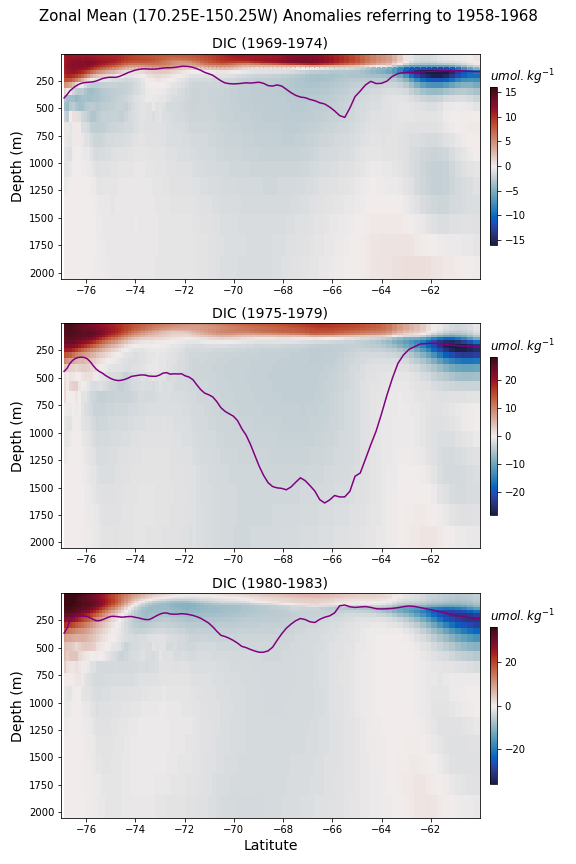

In [105]:
fig, axs = plt.subplots(3, 1, figsize=(8,12))

#map1 = axs[0,0].pcolormesh(lat_p, depth_p, dic58_mean.isel(y =slice(0,99), deptht=slice(0,30)), cmap=cm.tempo_r);
#axs[0,0].plot(lat, mld58_mean.isel(y=slice(0,99)), color='purple')
#axs[0,0].set_title('DIC 1958-1968 mean', fontsize= 15)

plt.suptitle('Zonal Mean (170.25E-150.25W) Anomalies referring to 1958-1968', fontsize=15, y=0.99)
anom1 = dic_69_mean.isel(y =slice(0,99), deptht=slice(0,30)) - dic_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax= 13.165; vmin= -18.565
map2 = axs[0].pcolormesh(lat_p, depth_p, anom1, vmax= 16, vmin=-16, cmap=cm.balance);
axs[0].plot(lat, mld69_mean.isel(y=slice(0,99)), color='purple')
axs[0].set_title('DIC (1969-1974)', fontsize= 14)

anom2 = dic_75_mean.isel(y =slice(0,99), deptht=slice(0,30))-dic_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=28.178 vmin=-28.385
map3 = axs[1].pcolormesh(lat_p, depth_p, anom2, cmap=cm.balance, vmax= 28, vmin= -28);
axs[1].plot(lat, mld75_mean.isel(y=slice(0,99)), color='purple')
axs[1].set_title('DIC (1975-1979)', fontsize= 14)

anom3 = dic_80_mean.isel(y =slice(0,99),deptht=slice(0,30))-dic_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=41.059 vmin=30.566
map4 = axs[2].pcolormesh(lat_p, depth_p, anom3, cmap=cm.balance, vmax= 36, vmin= -36);
axs[2].plot(lat, mld80_mean.isel(y=slice(0,99)), color='purple')
axs[2].set_title('DIC (1980-1983)', fontsize= 14)

for ax, maps in zip(axs.flat, [map2, map3, map4]) :
    ax.set(xlabel='Latitute', ylabel='Depth (m)'), ax.xaxis.label.set_size(14),ax.yaxis.label.set_size(14)
    ax.invert_yaxis()
    plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax).ax.set_title('$umol.kg^{-1}$', loc='left')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#For some reason related to the colormap, it is not working. It works when colormap is not in the figure.
#for ax in axs.flat:
#    ax.label_outer()

# so
axs[0].set(xlabel=None), axs[1].set(xlabel=None)
    
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'DIC_ross_zonalmeananom.pdf', format='PDF')

In [227]:
#for ax in axs.flat:
#    eval('map1 = ax.pcolormesh(lat_p, depth_p, dic58_mean.isel(y =slice(0,99), deptht=slice(0,30)), cmap=cm.tempo_r);')
#    ax.plot(lat, mld69_mean.isel(y=slice(0,99)), color='purple')
#    plt.colorbar(map1, pad=0.02, shrink=0.7).ax.set_title('$umol.kg^{-1}$', loc='left')
#    #c.ax.set_title('$umol.kg^{-1}$', loc='left')
#    ax.set(xlabel='Latitute', ylabel='Depth (m)')
#    ax.invert_yaxis()

PO4

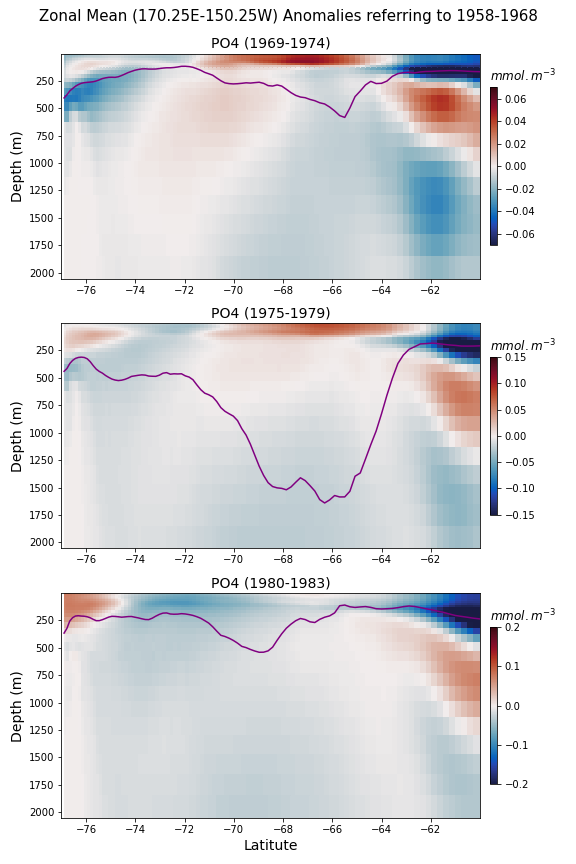

In [106]:
fig, axs = plt.subplots(3, 1, figsize=(8,12))

plt.suptitle('Zonal Mean (170.25E-150.25W) Anomalies referring to 1958-1968', fontsize=15, y=0.99)
anom1 = po4_69_mean.isel(y =slice(0,99), deptht=slice(0,30)) - po4_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax= 0.053; vmin= -0.093
map2 = axs[0].pcolormesh(lat_p, depth_p, anom1, cmap=cm.balance, vmax= 0.07, vmin= -0.07);
axs[0].plot(lat, mld69_mean.isel(y=slice(0,99)), color='purple')
axs[0].set_title('PO4 (1969-1974)', fontsize= 14)

anom2 = po4_75_mean.isel(y =slice(0,99), deptht=slice(0,30))-po4_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=0.080 vmin=-0.193
map3 = axs[1].pcolormesh(lat_p, depth_p, anom2, cmap=cm.balance, vmax= 0.15, vmin= -0.15);
axs[1].plot(lat, mld75_mean.isel(y=slice(0,99)), color='purple')
axs[1].set_title('PO4 (1975-1979)', fontsize= 14)

anom3 = po4_80_mean.isel(y =slice(0,99),deptht=slice(0,30))-po4_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=0.081 vmin=-0.269
map4 = axs[2].pcolormesh(lat_p, depth_p, anom3, cmap=cm.balance, vmax= 0.2, vmin= -0.2);
axs[2].plot(lat, mld80_mean.isel(y=slice(0,99)), color='purple')
axs[2].set_title('PO4 (1980-1983)', fontsize= 14)

for ax, maps in zip(axs.flat, [map2, map3, map4]) :
    ax.set(xlabel='Latitute', ylabel='Depth (m)'), ax.xaxis.label.set_size(14),ax.yaxis.label.set_size(14)
    ax.invert_yaxis()
    plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax).ax.set_title('$mmol.m^{-3}$', loc='left')

axs[0].set(xlabel=None), axs[1].set(xlabel=None)
    
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'PO4_ross_zonalmeananom.pdf', format='PDF')

In [114]:
anom3.min().values

array(-23.75091248)

O2

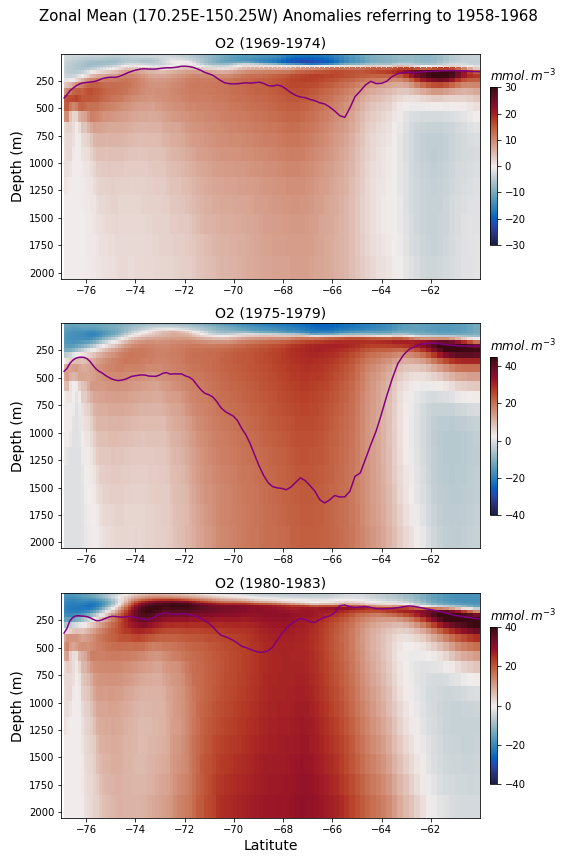

In [128]:
fig, axs = plt.subplots(3, 1, figsize=(8,12))

plt.suptitle('Zonal Mean (170.25E-150.25W) Anomalies referring to 1958-1968', fontsize=15, y=0.99)
anom1 = o2_69_mean.isel(y =slice(0,99), deptht=slice(0,30)) - o2_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax= 33.149; vmin= -22.775
map2 = axs[0].pcolormesh(lat_p, depth_p, anom1, cmap=cm.balance, vmax= 30, vmin= -30);
axs[0].plot(lat, mld69_mean.isel(y=slice(0,99)), color='purple')
axs[0].set_title('O2 (1969-1974)', fontsize= 14)

anom2 = o2_75_mean.isel(y =slice(0,99), deptht=slice(0,30))-o2_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=48.247 vmin=-25.398
map3 = axs[1].pcolormesh(lat_p, depth_p, anom2, cmap=cm.balance, vmax= 45, vmin= -40);
axs[1].plot(lat, mld75_mean.isel(y=slice(0,99)), color='purple')
axs[1].set_title('O2 (1975-1979)', fontsize= 14)

anom3 = o2_80_mean.isel(y =slice(0,99),deptht=slice(0,30))-o2_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=42.072 vmin=-23.751
map4 = axs[2].pcolormesh(lat_p, depth_p, anom3, cmap=cm.balance, vmax= 40, vmin= -40);
axs[2].plot(lat, mld80_mean.isel(y=slice(0,99)), color='purple')
axs[2].set_title('O2 (1980-1983)', fontsize= 14)

for ax, maps in zip(axs.flat, [map2, map3, map4]) :
    ax.set(xlabel='Latitute', ylabel='Depth (m)'), ax.xaxis.label.set_size(14),ax.yaxis.label.set_size(14)
    ax.invert_yaxis()
    plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax).ax.set_title('$mmol.m^{-3}$', loc='left')

axs[0].set(xlabel=None), axs[1].set(xlabel=None)
    
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'O2_ross_zonalmeananom.pdf', format='PDF')

Temperature

In [125]:
anom3.max().values, anom3.min().values

(array(1.98049582), array(-0.90898843))

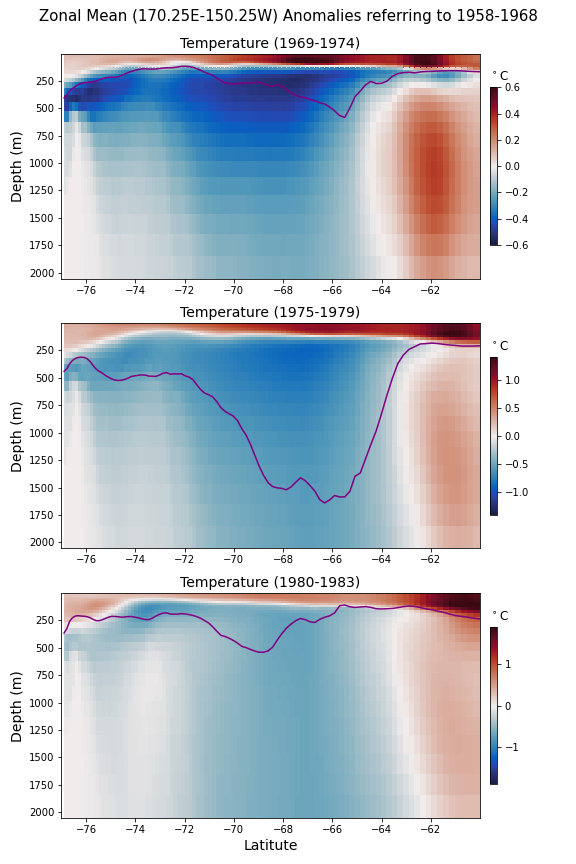

In [127]:
fig, axs = plt.subplots(3, 1, figsize=(8,12))

plt.suptitle('Zonal Mean (170.25E-150.25W) Anomalies referring to 1958-1968', fontsize=15, y=0.99)
anom1 = temp_69_mean.isel(y =slice(0,99), deptht=slice(0,30)) - temp_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax= 0.649; vmin= -0.547
map2 = axs[0].pcolormesh(lat_p, depth_p, anom1, cmap=cm.balance, vmax= 0.6, vmin=-0.6);
axs[0].plot(lat, mld69_mean.isel(y=slice(0,99)), color='purple')
axs[0].set_title('Temperature (1969-1974)', fontsize= 14)

anom2 = temp_75_mean.isel(y =slice(0,99), deptht=slice(0,30))-temp_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=1.438 vmin=-0.905
map3 = axs[1].pcolormesh(lat_p, depth_p, anom2, cmap=cm.balance, vmax=1.4, vmin=-1.4);
axs[1].plot(lat, mld75_mean.isel(y=slice(0,99)), color='purple')
axs[1].set_title('Temperature (1975-1979)', fontsize= 14)

anom3 = temp_80_mean.isel(y =slice(0,99),deptht=slice(0,30))-temp_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=1.985 vmin=-0.909
map4 = axs[2].pcolormesh(lat_p, depth_p, anom3, cmap=cm.balance, vmax= 1.9, vmin= -1.9);
axs[2].plot(lat, mld80_mean.isel(y=slice(0,99)), color='purple')
axs[2].set_title('Temperature (1980-1983)', fontsize= 14)

for ax, maps in zip(axs.flat, [map2, map3, map4]) :
    ax.set(xlabel='Latitute', ylabel='Depth (m)'), ax.xaxis.label.set_size(14),ax.yaxis.label.set_size(14)
    ax.invert_yaxis()
    plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax).ax.set_title('$^\circ$C', loc='left')

axs[0].set(xlabel=None), axs[1].set(xlabel=None)
    
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'temp_ross_zonalmeananom.pdf', format='PDF')

Salinity

In [134]:
anom1.max().values, anom1.min().values

(array(0.15976868), array(-0.18946285))

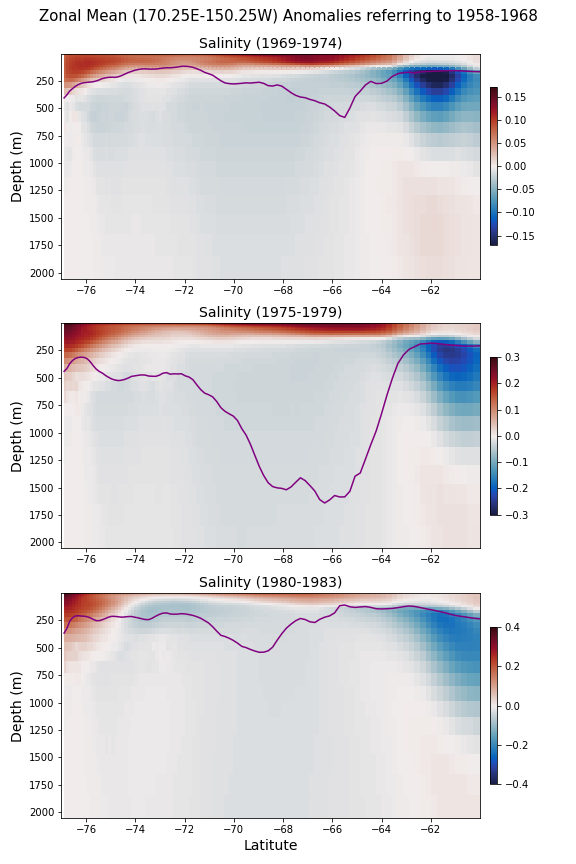

In [135]:
fig, axs = plt.subplots(3, 1, figsize=(8,12))

plt.suptitle('Zonal Mean (170.25E-150.25W) Anomalies referring to 1958-1968', fontsize=15, y=0.99)
anom1 = sal_69_mean.isel(y =slice(0,99), deptht=slice(0,30)) - sal_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax= 0.159; vmin= -0.189
map2 = axs[0].pcolormesh(lat_p, depth_p, anom1, cmap=cm.balance, vmax= 0.17, vmin=-0.17);
axs[0].plot(lat, mld69_mean.isel(y=slice(0,99)), color='purple')
axs[0].set_title('Salinity (1969-1974)', fontsize= 14)

anom2 = sal_75_mean.isel(y =slice(0,99), deptht=slice(0,30))-sal_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=0.319 vmin=-0.253
map3 = axs[1].pcolormesh(lat_p, depth_p, anom2, cmap=cm.balance, vmax= 0.3, vmin= -0.3);
axs[1].plot(lat, mld75_mean.isel(y=slice(0,99)), color='purple')
axs[1].set_title('Salinity (1975-1979)', fontsize= 14)

anom3 = sal_80_mean.isel(y =slice(0,99),deptht=slice(0,30))-sal_58_mean.isel(y =slice(0,99), deptht=slice(0,30)) #vmax=0.429 vmin=-0.244
map4 = axs[2].pcolormesh(lat_p, depth_p, anom3, cmap=cm.balance, vmax= 0.4, vmin= -0.4);
axs[2].plot(lat, mld80_mean.isel(y=slice(0,99)), color='purple')
axs[2].set_title('Salinity (1980-1983)', fontsize= 14)

for ax, maps in zip(axs.flat, [map2, map3, map4]) :
    ax.set(xlabel='Latitute', ylabel='Depth (m)'), ax.xaxis.label.set_size(14),ax.yaxis.label.set_size(14)
    ax.invert_yaxis()
    plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax)


axs[0].set(xlabel=None), axs[1].set(xlabel=None)
    
plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'sal_ross_zonalmeananom.pdf', format='PDF')